<a href="https://colab.research.google.com/github/SemenutaEgor/Extreme-events-in-phenomenological-neural-networks-with-different-types-of-connections/blob/master/1_quadrant_3_(upper_right).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import argrelextrema

a = 1
b = 3
c = 1
d = 5
x_r = -1.6
r = 0.01
s = 5
I = 4
v_s = 2
lambd = 10
Theta = -0.25

Gamma = lambda x_i: 1 / (1 + np.exp(-lambd * (x_i - Theta)))

def two_HRs(t, X, k1, k2, k):
    x1, y1, z1, x2, y2, z2  = X
    dx1 = y1 - a*x1**3 + b*x1**2 -z1 + I - k1*(x1 - v_s) * Gamma(x2) + k * (x2 - x1)
    dy1 = c - d*x1**2 - y1
    dz1 = r*(s*(x1 - x_r) - z1)
    
    dx2 = y2 - a*x2**3 + b*x2**2 -z2 + I - k2*(x2 - v_s) * Gamma(x1) + k * (x1 - x2)
    dy2 = c - d*x2**2 - y2
    dz2 = r*(s*(x2 - x_r) - z2)
    return [dx1, dy1, dz1, dx2, dy2, dz2]

def Hss(k1, k2, initials):
  sol = solve_ivp(two_HRs, [0, 10000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2, 0))
  ts = sol.t
  x1s, y1s, z1s, x2s, y2s, z2s = sol.y
  initials = [x1s[-1], y1s[-1], z1s[-1], x2s[-1], y2s[-1], z2s[-1]]

  ts = np.array(ts)
  x1s = np.array(x1s)
  x2s = np.array(x2s)
  xsum = x1s + x2s
  ts = ts[120000:]
  xsum = xsum[120000:]

  spikes_ind = argrelextrema(xsum, np.greater) 
  spikes = xsum[spikes_ind]

  mu = np.mean(spikes)
  sigma = np.std(spikes)
  Hs = mu + 6*sigma

  ee_counter = (spikes >= Hs).sum()

  return [ee_counter, initials]

In [ ]:
# rows1 = np.linspace(-0.5, -0.25, 4, endpoint=False)
rows2 = np.linspace(-0.25, 0.0, 50, endpoint=True)
# cols1 = np.linspace(-0.5, -0.25, 4, endpoint=False)
cols2 = np.linspace(-0.25, 0.0, 50, endpoint=True)

# grid1 = np.zeros([len(rows1), len(cols1)])
# grid2 = np.zeros([len(rows1), len(cols2)])
grid3 = np.zeros([len(rows2), len(cols2)])
# grid4 = np.zeros([len(rows2), len(cols1)])

diag_initials = [-1.5, 0, 0, -1.5, 0, 0]
up_initials = [-1.5, 0, 0, -1.5, 0, 0]
right_initials = [-1.5, 0, 0, -1.5, 0, 0]

for i,  k1 in enumerate(cols2):
  for j, k2 in enumerate(rows2):
    print('k1 = ', k1, 'k2 = ', k2)
    if (i == j): 
      grid3[i][j], rec_initials = Hss(k1, k2, diag_initials)
      diag_initials = rec_initials
    if i > j:
      grid3[i][j], rec_initials = Hss(k1, k2, right_initials)
      right_initials = rec_initials
    if i < j: 
      grid3[i][j], rec_initials = Hss(k1, k2, up_initials)
      up_initials = rec_initials


with open('/content/drive/My Drive/Colab Notebooks/quadrant3.txt', 'w') as f:
    np.savetxt(f, grid3)

with open('/content/drive/My Drive/Colab Notebooks/diag_initials3.txt', 'w') as f:
    np.savetxt(f, diag_initials)

with open('/content/drive/My Drive/Colab Notebooks/right_initials3.txt', 'w') as f:
    np.savetxt(f, right_initials)

with open('/content/drive/My Drive/Colab Notebooks/up_initials3.txt', 'w') as f:
    np.savetxt(f, up_initials)

k1 =  -0.25 k2 =  -0.25
k1 =  -0.25 k2 =  -0.24489795918367346
k1 =  -0.25 k2 =  -0.23979591836734693
k1 =  -0.25 k2 =  -0.23469387755102042
k1 =  -0.25 k2 =  -0.22959183673469388
k1 =  -0.25 k2 =  -0.22448979591836735
k1 =  -0.25 k2 =  -0.2193877551020408
k1 =  -0.25 k2 =  -0.2142857142857143
k1 =  -0.25 k2 =  -0.20918367346938777
k1 =  -0.25 k2 =  -0.20408163265306123
k1 =  -0.25 k2 =  -0.1989795918367347
k1 =  -0.25 k2 =  -0.19387755102040816
k1 =  -0.25 k2 =  -0.18877551020408162
k1 =  -0.25 k2 =  -0.1836734693877551
k1 =  -0.25 k2 =  -0.17857142857142858
k1 =  -0.25 k2 =  -0.17346938775510207
k1 =  -0.25 k2 =  -0.16836734693877553
k1 =  -0.25 k2 =  -0.163265306122449
k1 =  -0.25 k2 =  -0.15816326530612246
k1 =  -0.25 k2 =  -0.15306122448979592
k1 =  -0.25 k2 =  -0.14795918367346939
k1 =  -0.25 k2 =  -0.14285714285714285
k1 =  -0.25 k2 =  -0.13775510204081634
k1 =  -0.25 k2 =  -0.1326530612244898
k1 =  -0.25 k2 =  -0.12755102040816327
k1 =  -0.25 k2 =  -0.12244897959183673
k1 =  -0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


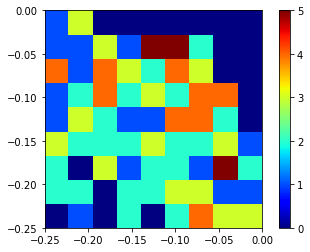

In [ ]:
plt.pcolormesh(rows2, cols2, grid3, cmap=plt.cm.get_cmap('jet'))
plt.axes().set_aspect('equal', adjustable='box')
plt.colorbar()